In [421]:
import pandas as pd
import numpy as np

In [422]:
# Importing dataset to be processed with pandas & displaying the top 10 result
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [423]:
# Displaying additional description
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [424]:
# Make a correlation matrix between the columns/features and target in ascending order
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

Text(0.5, 1.0, 'relationship between f4 & response')

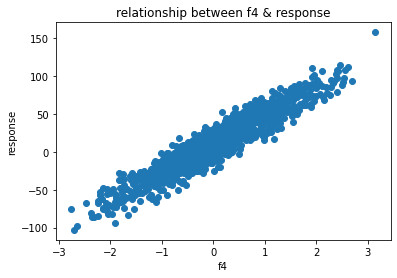

In [425]:
# let's plot f4 & response, because f4 corr value is close to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f4, dt.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship between f4 & response')

Text(0.5, 1.0, 'relationship between f1 & response')

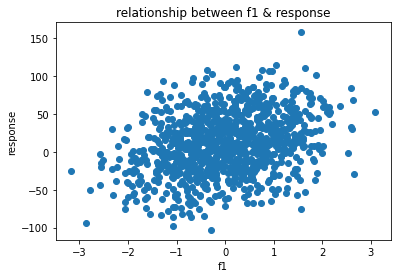

In [426]:
# let's also plot f1 & response, because f1 corr value is the second closest to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f1, dt.response)
plt.xlabel('f1')
plt.ylabel('response')
plt.title('relationship between f1 & response')

In [427]:
# our group has decided to compare the linear regression between f4, f1 & f2 and shows their difference
# Splitting the training and test set with the ratio of 8:2 for f4
from sklearn.model_selection import train_test_split
X_f4 = np.array(dt.iloc[:, 3])
y_f4 = np.array(dt.iloc[:, -1])
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_f4, y_f4, random_state=42, train_size=0.8)

In [428]:
# Splitting the training and test set with the ratio of 8:2 for f1
X_f1 = np.array(dt.iloc[:, 0])
y_f1 = np.array(dt.iloc[:, -1])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_f1, y_f1, random_state=42, train_size=0.8)

In [429]:
# Splitting the training and test set with the ratio of 8:2 for f2
X_f2 = np.array(dt.iloc[:, 1])
y_f2 = np.array(dt.iloc[:, -1])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_f2, y_f2, random_state=42, train_size=0.8)

In [430]:
alpha = 0.05 # Set learning rate to 0.05
max_epoch = 100 # Set max iteration to 100

In [431]:
# the loss function accept y as y dataset and yhat as the predicted y value
def loss_fn(y, yhat):
    # loss = the sum of (y-yhat)^2/len(y)
    # len(y) returns the number of elements in y
    loss = np.sum((y-yhat)**2)/len(y)
    return loss

In [432]:
# train model accepts X as X dataset, y as y dataset, alpha as learning rate, max_epoch as max number of iterations
def train_model(X, y, alpha, max_epoch):
    # we initialize weight and bias as both 0
    # assign len(X) to n
    # creating an empty array to store losses and weights value to be displayed after each iteration later
    w = b = 0
    n = len(X)
    losses = []
    weights = []
    epoch = []

    # the prediction function accepts w as weight, and X as the X dataset
    def prediction(w, X):
        # yhat returns the predicted y value by using the general gradient formula
        # y = mx + c
        # but in this case m = w and b = c
        yhat = (w * X) + b
        return yhat;

    # for loop will keep looping until max_epoch is reached
    for i in range(max_epoch):
        # assign prediction function to y_predict and loss_fn to loss
        y_predict = prediction(w, X)
        loss = loss_fn(y, y_predict)

        # losses will append loss after each iteration
        # weights will append w after each iteration
        losses.append(loss)
        weights.append(w)
        epoch.append(i+1)

        # calling loss_fn to calculate the next loss value using y & y_predict
        loss_fn(y, y_predict)

        # calculate the derivatives of both w & b in wd & bd
        wd = -(2/n)*sum(X*(y-y_predict))
        bd = -(2/n)*sum(y-y_predict)

        # w & b will update its own value using wb, bd and alpha
        w = w - alpha * wd
        b = b - alpha * bd

        # will print the i number of iteration, loss, weight, and bias for that iteration
        print(f"Iteration {i+1}: Loss {loss}");
    # creating a plot to display the decreasing loss and increasing epoch after each iteration
    plt.figure(figsize=(8,6))
    plt.plot(epoch, losses)
    plt.scatter(epoch, losses, marker='o', color='red')
    plt.title("Loss vs Epoch")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.show()

    # the function will return the estimated weight and bias
    return w, b

Iteration 1: Loss 1721.3069867699319
Iteration 2: Loss 1405.3055099532037
Iteration 3: Loss 1153.4832967677485
Iteration 4: Loss 952.7816648751703
Iteration 5: Loss 792.803396908424
Iteration 6: Loss 665.2695113774258
Iteration 7: Loss 563.5870575067208
Iteration 8: Loss 482.5052166298553
Iteration 9: Loss 417.8416459497511
Iteration 10: Loss 366.26469967465556
Iteration 11: Loss 325.120103497375
Iteration 12: Loss 292.29299665190285
Iteration 13: Loss 266.09811497245124
Iteration 14: Loss 245.19236673775538
Iteration 15: Loss 228.50522868871278
Iteration 16: Loss 215.18332451897
Iteration 17: Loss 204.54629168339946
Iteration 18: Loss 196.05163375817662
Iteration 19: Loss 189.26672598715413
Iteration 20: Loss 183.84651584057946
Iteration 21: Loss 179.51575809278577
Iteration 22: Loss 176.05486075694773
Iteration 23: Loss 173.2886066498761
Iteration 24: Loss 171.07716529971506
Iteration 25: Loss 169.3089292279552
Iteration 26: Loss 167.89480359583732
Iteration 27: Loss 166.763653783700

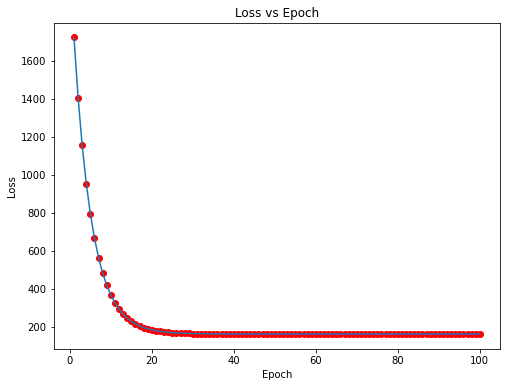

Estimated Weight: 36.97965738352224
Estimated Bias: 9.59281343763888


In [433]:
#---------------------------------------------------------------------------------------------------------------------
# we'll input the training dataset from f4 to train_model
# and have est_weight & est_bias as the final estimated value
est_weight4, est_bias4 = train_model(X_train4, y_train4, alpha, max_epoch)
print(f"Estimated Weight: {est_weight4}\nEstimated Bias: {est_bias4}")
# keep scrolling down to see the training loss against epoch graph

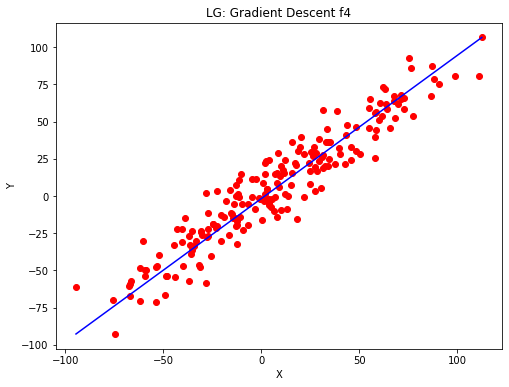

In [434]:
# y_pred4 is the predicted y value using both estimated weight & bias and the X test dataset
y_pred4 = (est_weight4*X_test4) + est_bias4
plt.figure(figsize = (8,6))

# scatter the y test & y pred value and plot them
plt.scatter(y_test4, y_pred4, marker='o', color='red')
plt.plot([min(y_test4), max(y_test4)], [min(y_pred4), max(y_pred4)], color='blue', label="line1")

plt.title("LG: Gradient Descent f4")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [435]:
# this is to measure the error using mean absolute error, mean squared error, and r2 score for f4
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test4, y_pred4))
print(mean_squared_error(y_test4, y_pred4))
print(r2_score(y_test4, y_pred4))
#-----------------------------------------------------------------------------------------------------------------------

10.593490871476984
173.28586057844316
0.8978522837182593


Iteration 1: Loss 1721.3069867699319
Iteration 2: Loss 1664.1289672291534
Iteration 3: Loss 1617.7563513482235
Iteration 4: Loss 1580.1470747504163
Iteration 5: Loss 1549.645008251549
Iteration 6: Loss 1524.907016168926
Iteration 7: Loss 1504.8438011210628
Iteration 8: Loss 1488.57192947622
Iteration 9: Loss 1475.374924167421
Iteration 10: Loss 1464.6717110434745
Iteration 11: Loss 1455.9910288702958
Iteration 12: Loss 1448.950675807889
Iteration 13: Loss 1443.2406782408693
Iteration 14: Loss 1438.60964062137
Iteration 15: Loss 1434.853675105037
Iteration 16: Loss 1431.8074233970751
Iteration 17: Loss 1429.3367753824025
Iteration 18: Loss 1427.332963851975
Iteration 19: Loss 1425.7077752488444
Iteration 20: Loss 1424.3896655127662
Iteration 21: Loss 1423.32060996652
Iteration 22: Loss 1422.4535485168276
Iteration 23: Loss 1421.7503136618625
Iteration 24: Loss 1421.1799500609695
Iteration 25: Loss 1420.717351666902
Iteration 26: Loss 1420.3421564063026
Iteration 27: Loss 1420.0378497363

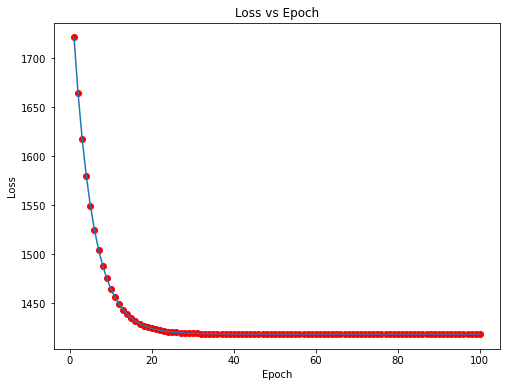

Estimated Weight: 12.44789107822706
Estimated Bias: 12.221271994008513


In [436]:
#-----------------------------------------------------------------------------------------------------------------------
# we'll input the training dataset from f1 to train_model
# and have est_weight & est_bias as the final estimated value
est_weight1, est_bias1 = train_model(X_train1, y_train1, alpha, max_epoch)
print(f"Estimated Weight: {est_weight1}\nEstimated Bias: {est_bias1}")

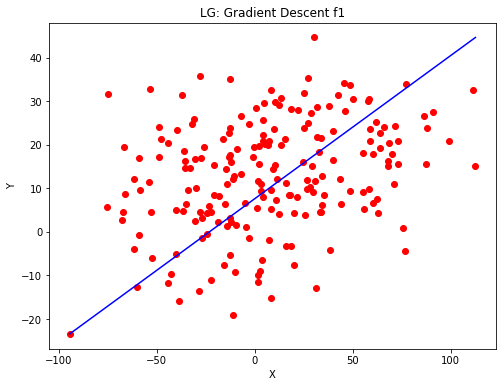

In [437]:
# y_pred1 is the predicted y value using both estimated weight & bias and the X test dataset
y_pred1 = (est_weight1*X_test1) + est_bias1
plt.figure(figsize = (8,6))

# scatter the y test & y pred value and plot them
plt.scatter(y_test1, y_pred1, marker='o', color='red')
plt.plot([min(y_test1), max(y_test1)], [min(y_pred1), max(y_pred1)], color='blue', label="line1")

plt.title("LG: Gradient Descent f1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [438]:
# this is to measure the error using mean absolute error, mean squared error, and r2 score for f1
print(mean_absolute_error(y_test1, y_pred1))
print(mean_squared_error(y_test1, y_pred1))
print(r2_score(y_test1, y_pred1))
#----------------------------------------------------------------------------------------------------------------------

32.43706374324995
1573.3645802657277
0.07254060881689317


Iteration 1: Loss 1721.3069867699319
Iteration 2: Loss 1692.2239936317194
Iteration 3: Loss 1668.7522179820778
Iteration 4: Loss 1649.8060131085635
Iteration 5: Loss 1634.5103757410043
Iteration 6: Loss 1622.1599593349738
Iteration 7: Loss 1612.186085234444
Iteration 8: Loss 1604.1301866325934
Iteration 9: Loss 1597.622427375317
Iteration 10: Loss 1592.3644843419752
Iteration 11: Loss 1588.1156803168747
Iteration 12: Loss 1584.6818134984042
Iteration 13: Loss 1581.9061577549908
Iteration 14: Loss 1579.6622105862143
Iteration 15: Loss 1577.8478484256248
Iteration 16: Loss 1576.3806153959988
Iteration 17: Loss 1575.1939250825649
Iteration 18: Loss 1574.2339978822483
Iteration 19: Loss 1573.4573910705665
Iteration 20: Loss 1572.8290065518925
Iteration 21: Loss 1572.3204836482241
Iteration 22: Loss 1571.9089023008744
Iteration 23: Loss 1571.5757365640782
Iteration 24: Loss 1571.3060099468667
Iteration 25: Loss 1571.0876135623257
Iteration 26: Loss 1570.9107556159006
Iteration 27: Loss 1570

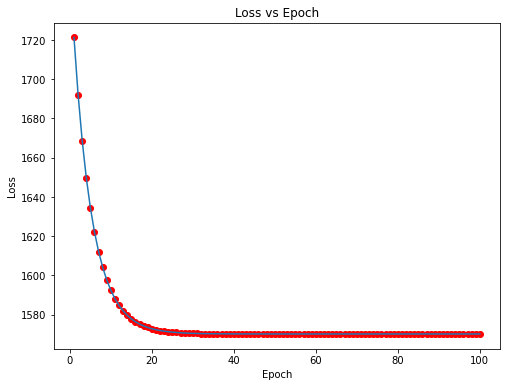

Estimated Weight: -1.20584713768932
Estimated Bias: 12.170196515149826


In [439]:
#----------------------------------------------------------------------------------------------------------------------
# we'll input the training dataset from f2 to train_model
# and have est_weight & est_bias as the final estimated value
est_weight2, est_bias2= train_model(X_train2, y_train2, alpha, max_epoch)
print(f"Estimated Weight: {est_weight2}\nEstimated Bias: {est_bias2}")

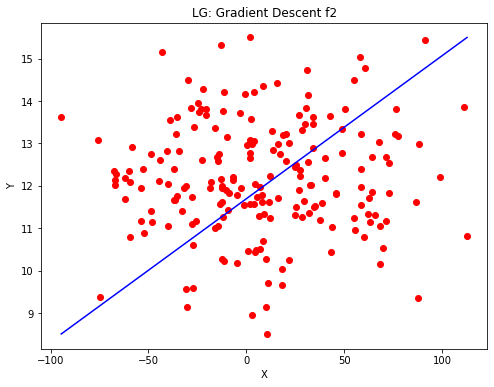

In [440]:
# y_pred4 is the predicted y value using both estimated weight & bias and the X test dataset
y_pred2 = (est_weight2*X_test2) + est_bias2
plt.figure(figsize = (8,6))

# scatter the y test & y pred value and plot them
plt.scatter(y_test2, y_pred2, marker='o', color='red')
plt.plot([min(y_test2), max(y_test2)], [min(y_pred2), max(y_pred2)], color='blue', label="line1")

plt.title("LG: Gradient Descent f2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [441]:
# this is to measure the error using mean absolute error, mean squared error, and r2 score for f2
print(mean_absolute_error(y_test2, y_pred2))
print(mean_squared_error(y_test2, y_pred2))
print(r2_score(y_test2, y_pred2))
#-----------------------------------------------------------------------------------------------------------------------

33.76331819803102
1719.506765216004
-0.013606584008091227
